In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

from adaboost import Adaboost

# Données simulées

In [122]:
# Génération et séparation des données simulées

n_samples, n_features = 5000, 30
sim_normal = np.random.standard_normal((n_samples, n_features))
rand_f = np.random.randn(n_features)
sim_sample = sim_normal.dot(rand_f) + np.random.randn(n_samples)
y_simulated = np.sign(sim_sample)
X_train, X_test, y_train, y_test = train_test_split(sim, y_simulated, test_size=0.3)

In [123]:
# Entraînement des modèles sur les données simulées

sklearn_adaboost_clf = AdaBoostClassifier()
sklearn_adaboost_clf.fit(X_train, y_train)

gradient_boosting_clf = GradientBoostingClassifier()
gradient_boosting_clf.fit(X_train, y_train)

from_scratch_adaboost_clf = Adaboost()
from_scratch_adaboost_clf.fit(X_train, y_train)

log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
# Performances des différents algorithmes sur les données simulées

print('Sklearn AdaBoost Classifier')
y_pred = sklearn_adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

print('Gradient Boosting Classifier')
y_pred = gradient_boosting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

print('From scratch AdaBoost Classifier')
y_pred = from_scratch_adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

print('Logistic Regression Classifier')
y_pred = log_reg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy :', accuracy)

Sklearn AdaBoost Classifier
Accuracy : 0.494
Gradient Boosting Classifier
Accuracy : 0.5073333333333333
From scratch AdaBoost Classifier
Accuracy : 0.514
Logistic Regression Classifier
Accuracy : 0.5253333333333333


Sur ces données simulées et pour un nombre fixe de classifieurs, le meilleur algortihme semble être la régression logistique.

# Données réelles

## Données relatives au cancer du sein de scikit-learn

In [94]:
# Importation des données et processing

data = datasets.load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [101]:
# Calcul de l'accuracy pour 5 classifieurs faibles pour chacun des modèles

sklearn_adaboost_clf = AdaBoostClassifier(n_estimators=50)
sklearn_adaboost_clf.fit(X_train, y_train)
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=50)
gradient_boosting_clf.fit(X_train, y_train)
from_scratch_adaboost_clf = Adaboost(n_clf=5)
from_scratch_adaboost_clf.fit(X_train, y_train)

print('Sklearn AdaBoost Classifier')
y_pred = sklearn_adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy :', accuracy)

print('Gradient Boosting Classifier')
y_pred = gradient_boosting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy :', accuracy)

print('From scratch AdaBoost Classifier')
y_pred = from_scratch_adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy :', accuracy)

Sklearn AdaBoost Classifier
Accuracy : 0.9824561403508771
Gradient Boosting Classifier
Accuracy : 0.9766081871345029
From scratch AdaBoost Classifier
Accuracy : 0.6432748538011696


Pour ces données, le meilleur algorithme semble être ici AdaBoost.

## Classification d'accidents graves

Le jeu de données réel utilisé recense des accidents de la route.
Il contient environ 24000 observations et 31 variables.
La variable cible est **grav** et elle indique si l'accident qui a eu lieu est grave (modalité 1) ou non (modalité 0).

In [105]:
# Importation et processing des données

df = pd.read_csv("road_accidents.csv")
df = df.drop('gps', axis=1)
data = df.iloc[:, :29]
target = df['grav']
target[target == 0] = -1

In [106]:
# Séparation train/test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3)

### Influence du nombre de classifieurs

In [111]:
# Calcul de l'accuracy des modèles pour différents nombres de classifieurs

sklearn_adaboost_accuracies = []
gradient_boosting_accuracies = []
for i in range(5,300,5):
    
    # Entrainement des modèles à i classifieurs faibles
    sklearn_adaboost_clf = AdaBoostClassifier(n_estimators=i)
    sklearn_adaboost_clf.fit(X_train, y_train)
    gradient_boosting_clf = GradientBoostingClassifier(n_estimators=i)
    gradient_boosting_clf.fit(X_train, y_train)
    
    # Prédiction et calcul de l'accuracy pour sklearn AdaBoost
    y_pred = sklearn_adaboost_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sklearn_adaboost_accuracies += [accuracy]
    
    # Prédiction et calcul de l'accuracy pour sklearn GradientBoosting
    y_pred = gradient_boosting_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    gradient_boosting_accuracies += [accuracy]

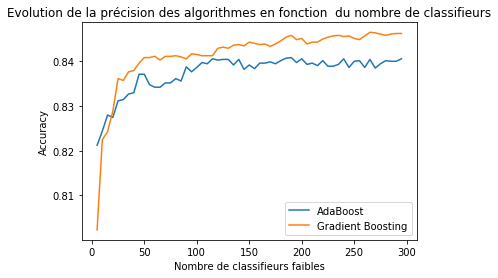

In [112]:
# Graphique des performances

x = range(5,300,5)

plt.plot(x,sklearn_adaboost_accuracies, label='AdaBoost')
plt.plot(x,gradient_boosting_accuracies, label='Gradient Boosting')

plt.title("Evolution de la précision des algorithmes en fonction  du nombre de classifieurs")
plt.xlabel("Nombre de classifieurs faibles")
plt.ylabel("Accuracy")
plt.legend()


plt.show()

### Influence du Learning Rate

Au vu des résultats précédents (stabilisation de l'accuracy), on choisit un nombre de classifieurs égal à 100 pour AdaBoost et 250 pour Gradient Boosting.

In [114]:
# Calcul de l'accuracy des modèles pour différents nombres de classifieurs

sklearn_adaboost_accuracies = []
gradient_boosting_accuracies = []
for i in range(1,50):
    
    # Entrainement des modèles à i classifieurs faibles
    sklearn_adaboost_clf = AdaBoostClassifier(learning_rate=(i/100),n_estimators=100)
    sklearn_adaboost_clf.fit(X_train, y_train)
    gradient_boosting_clf = GradientBoostingClassifier(learning_rate=(i/100), n_estimators=250)
    gradient_boosting_clf.fit(X_train, y_train)
    
    # Prédiction et calcul de l'accuracy pour sklearn AdaBoost
    y_pred = sklearn_adaboost_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sklearn_adaboost_accuracies += [accuracy]
    
    # Prédiction et calcul de l'accuracy pour sklearn GradientBoosting
    y_pred = gradient_boosting_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    gradient_boosting_accuracies += [accuracy]

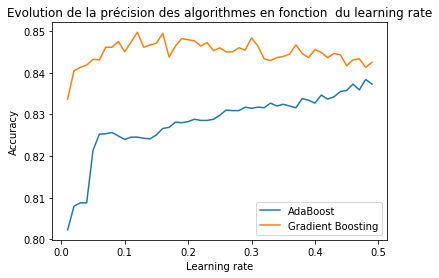

In [116]:
# Graphique des performances

x = [i/100 for i in range(1,50)]

plt.plot(x,sklearn_adaboost_accuracies, label='AdaBoost')
plt.plot(x,gradient_boosting_accuracies, label='Gradient Boosting')

plt.title("Evolution de la précision des algorithmes en fonction  du learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.legend()


plt.show()

In [72]:
# Calcul de l'accuracy en utilisant une régression logistique (sklearn)

log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)
y_pred = log_reg_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Régression logistique')
print('Accuracy', accuracy)

Régression logistique
Accuracy 0.8140467302640675


On peut constater ici que les deux algorithmes de Boosting obtiennent de meilleurs résultats de classification que la régression logistique simple.